In [1]:

using PyPlot

In [2]:

"""
    ans = mytrapezoids(fun, a, b, n)

Numerically evaluate the integral int_a^b fun(x) dx using the
trapezoidal rule: I = h/2*(f_1 + 2f_2 + ... + 2f_{n-1} + f_n),
where h = (b - a)/(n - 1), x_i = a + (i - 1)*h, f_i = fun(x_i).
"""
function mytrapezoids(fun, a, b, n)
    h = (b - a)/(n - 1)
    s1 = fun(a) + fun(b)
    s2 = 0.0
    for i = 2:(n-1)
        s2 += fun(a + (i-1)*h)
    end
    return (s1 + 2*s2)*h/2
end

mytrapezoids

In [3]:

fun1(x) = 1/x
a1 = 1.0
b1 = 2.0
np1 = 20
exact1 = log(2)

0.6931471805599453

In [4]:

round(abs(mytrapezoids(fun1, a1, b1, np1) - exact1), sigdigits=1)

0.0002

In [5]:

fun2(x) = exp(x)
a2 = 0.0
b2 = 1.0
np2 = 100
exact2 = exp(1) - 1.0

1.718281828459045

In [6]:

round(abs(mytrapezoids(fun2, a2, b2, np2) - exact2), sigdigits=1)

1.0e-5

In [7]:

fun3(x) = sin(x)
a3 = 0.0
b3 = pi
exact3 = 2.0

2.0

In [8]:

ndp = 10           # number of tests
errt = zeros(ndp)  # absolute errors
hh = zeros(ndp);   # integration steps

In [9]:

for k = 1:ndp 
    np = 2^k + 1
    hh[k] = (b3 - a3)/(np - 1)
    errt[k] = abs(mytrapezoids(fun3, a3, b3, np) - exact3)
end

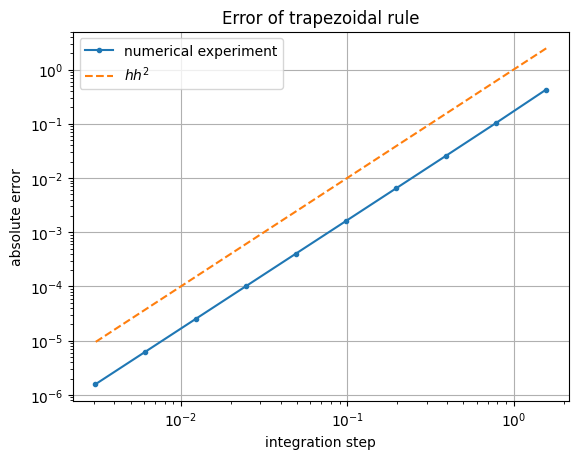

In [10]:

loglog(hh, errt, label="numerical experiment", marker=".")
p = 2
loglog(hh, hh .^ p, linestyle="dashed", label=L"hh^{%$p}")
grid(true)
xlabel("integration step")
ylabel("absolute error")
title("Error of trapezoidal rule")
legend();

In [11]:

"""
    ans = mytrapezoids2(f, h)

Numerically evaluate the integral int_a^b fun(x) dx using the
trapezoidal rule: I = h/2*(f[1] + 2f[2] + ... + 2f[n-1] + f[n]),
where h = (b - a)/(n - 1), x_i = a + (i - 1)*h, f[i] = fun(x_i).
"""
function mytrapezoids2(fvec, h)
    s1 = fvec[1] + fvec[end]
    s2 = sum(fvec)
    return (2*s2 - s1)*h/2
end

mytrapezoids2

In [12]:

"""
    ans = mysimpsons2(fun, a, b, n)

Numerically evaluate the integral int_a^b fun(x) dx using the
Simpson's rule, where h = (b - a)/(n - 1), x_i = a + (i - 1)*h, fvec[i] = fun(x_i).
"""
function mysimpsons2(fun, a, b, n)
    x = range(a, b, n)
    fvec = fun.(x)
    h = x[2] - x[1]
    t1 = mytrapezoids2(fvec, h)
    t2 = mytrapezoids2(fvec[1:2:n], 2*h)
    return (4*t1 - t2)/3
end

mysimpsons2

In [13]:

np1 = 21
round(abs(mysimpsons2(fun1, a1, b1, np1) - exact1), sigdigits=1)

2.0e-7

In [14]:

np1t = 501
round(abs(mytrapezoids(fun1, a1, b1, np1t) - exact1), sigdigits=1)

2.0e-7

In [15]:

np2 = 101
round(abs(mysimpsons2(fun2, a2, b2, np2) - exact2), sigdigits=1)

1.0e-10

In [16]:

np2t = 34001
round(abs(mytrapezoids(fun2, a2, b2, np2t) - exact2), sigdigits=1)

1.0e-10

In [1]:

] add BenchmarkTools

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///workspaces/phys2200-lectures-ewt22002/lecture_08/In[1]#2:1\[90mIn[1]:2:1[0;0m]8;;\

[48;2;120;70;70m][0;0m add BenchmarkTools
[90m╙ ── [0;0m[91munexpected `]`[0;0m

In [3]:

using BenchmarkTools

In [4]:

function init1(n)
    x = zeros(n)
    for i = 1:n
        x[i] = i/2
    end
    return x
end

init1 (generic function with 1 method)

In [5]:

function init2(n)
    x = []
    for i = 1:n
        push!(x, i/2)
    end
    return x
end

init2 (generic function with 1 method)

In [6]:

x1 = init1(100)
x2 = init2(100);

In [7]:

x1 = init1(100)
x2 = init2(100);

In [8]:
x1 == x2

true

In [9]:

@btime init1(100);

  83.548 ns (2 allocations: 928 bytes)


In [10]:

@btime init2(100);

  831.547 ns (104 allocations: 3.50 KiB)
